# Name: [Nourhan Fooda]
# ID: [1610386]

# <center><font color=darkred>CSCI451 Final Project: Image Cartoonizing </font>

### <left><font color=darkred>Needed Packages </font>

In [115]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
from zipfile import ZipFile

### <left><font color=darkred>Dataset </font>

In [116]:
#Loading faces dataset as a zipped file
zip_path = 'C:/Users/Nourhan A. Fooda/Downloads/CSCI451 - Digital Image Processing/Project/Dataset/faces.zip'

#Printing the number of images in the dataset
with ZipFile(zip_path) as myzip:
        images_in_zip = myzip.namelist()
len(images_in_zip)

1030

### <left><font color=darkred>Functions Implementation </font>

In [132]:
#function to plot the original image vs the cartoonized image
def PlotComparison(original, result):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(result, 'gray')
    ax2.set_title('Cartoon')
    ax2.axis('off')
    plt.subplots_adjust(wspace=0.02)

In [133]:
#function to cartoonize the image
def Cartooning(img):
    
    #getting copy of the image(img)
    new_img = img

    samples = 3  #number of downscaling or upscaling steps
    filters = 13  #number of bilateral filtering steps

    #downsampling the image using Gaussian pyramid
    for i in range(samples):
        new_img = cv.pyrDown(new_img)

    #applying repeated small bilateral filters on the downsampled image
    for j in range(filters):
        new_img = cv.bilateralFilter(new_img, d=9, sigmaColor=9, sigmaSpace=9)

    #upsampling the filtered image to its original size
    for x in range(samples):
        new_img = cv.pyrUp(new_img)

    # converting the original image to grayscale
    gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    
    #applying median blur filter on the grayscaled image
    blur_img = cv.medianBlur(gray_img, 11)

    #creating an edge mask of the blurred grayscale image
    edge_mask = cv.adaptiveThreshold(blur_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=9, C=2)

    #converting the grayscaled edge mask to colored mask
    #edge_mask = cv.cvtColor(edge_mask, cv.COLOR_GRAY2RGB)
    
    #bit-ANDing the filterd image with the edge mask to create the cartoonized image
    #cartoon_img = cv.bitwise_and(new_img, edge_mask)
    
    return  edge_mask

In [134]:
#function to load an image(n) from the dataset
#(n) represents the number/index of image in the dataset which ranges from 1 to 1029
def LoadImage(n):
    with ZipFile(zip_path) as myzip:
        #getting the items(images) of the zipped file
        images_in_zip = myzip.namelist()
        with myzip.open(images_in_zip[n]) as myfile:
            #opening an image with index[n] using PILLOW
            pil_img = Image.open(myfile)
            #converting the PILLOW image to OpenCV image
            cv_img = cv.cvtColor(np.array(pil_img), cv.COLOR_RGB2BGR)
            #Converting the OpenCV BGR image to OpenCV RGB image
            original = cv.cvtColor(cv_img, cv.COLOR_BGR2RGB)
            
            return original

In [135]:
#function to save the resulting plot
def SavePlot(n):
    #saving a plot with index/name[n] inside "Results" folder
    path = 'Results/'+ str(n) +'.png'
    plt.savefig(path, bbox_inches = 'tight', pad_inches = 0.1)

In [136]:
#function to diplay the comparison plot between the original image and cartoon image
#(n) stands for both the index of displayed image and the the number(name) of saved plot
def DisplayPlot(n):
    original = LoadImage(n) #original image with index[n] loaded from the dataset
    cartoon = Cartooning(original) #cartoonized image
    PlotComparison(original, cartoon) #plotting comparison between the origianl and cartoon images
    #SavePlot(n) #saving the resulting comparsion plot with name[n]

### <left><font color=darkred>Test "Results" </font>

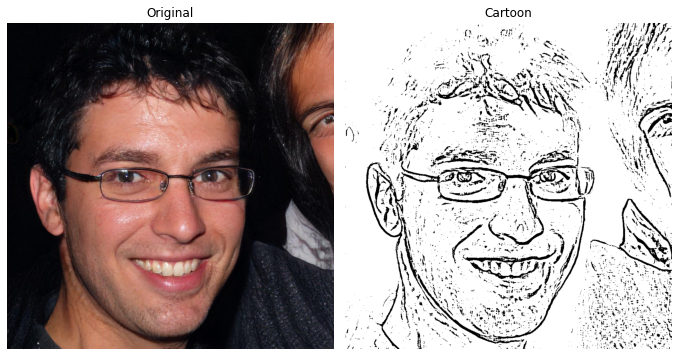

In [137]:
#Display a plot comparison between an original image with index[n] and its cartoon version, then save it with name[n].
DisplayPlot(1011)